PROJEKT - Analiza danych

Wybrany został zbiór danych dotyczący ofert sprzedaży mieszkań z serwisu OTODOM z czerwca 2024, na podstawie którego przeprowadzona zostanie analiza eksploracyjna danych.  

Plik analizowany nazywa się  apartments_pl_2024_06.csv, który pochodzi z serwisu Kaggle. Autorem jest Pan Krzysztof Jamroz. https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland  

Projekt dotyczy analizy danych ofert sprzedaży mieszkań z  15 największych miast w Polsce. Są to:  Białystok
Bydgoszcz
Częstochowa
Gdańsk
Gdynia
Katowice
Kraków
Lublin
Łódź
Poznań
Radom
Rzeszów
Szczecin
Warszawa
Wrocław

Podział zadań:
Czyszczenie, przekształcanie danych i statystyki opisowe - Mikołaj, Maja - osoba sprawdzająca
Eksploracyjna analiza danych i wizuaizacje - Michał, Mikołaj - osoba sprawdzająca
Wnioskowanie statystyczne - Maja, Michał - osoba sprawdzająca


In [70]:
#Importowanie bibliotek

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm


Wyjaśnienia zmiennych 

- **city** — Nazwa miasta, w którym znajduje się nieruchomość.
- **type** — Typ budynku (np. blockOfFlats – blok, apartmentBuilding – kamienica/budynek wielorodzinny).
- **squareMeters** — Powierzchnia mieszkania w metrach kwadratowych (m²).
- **rooms** — Liczba pokoi w mieszkaniu.
- **floor** — Piętro, na którym zlokalizowane jest mieszkanie.
- **floorCount** — Całkowita liczba pięter w budynku.
- **buildYear** — Rok budowy budynku.
- **latitude, longitude** — Współrzędne geograficzne nieruchomości.
- **centreDistance** — Odległość od centrum miasta (w km).
- **poiCount** — Liczba punktów użyteczności publicznej (POI) w promieniu 500 m od mieszkania.
- **[poiName]Distance** — Odległość do najbliższego punktu użyteczności publicznej danego typu (np. schoolDistance, pharmacyDistance).
- **ownership** — Rodzaj własności (np. condominium – własność, cooperative – spółdzielcze).
- **condition** — Stan/standard wykończenia mieszkania (np. premium, high, low).
- **has[features]** — Zmienne logiczne (tak/nie) opisujące udogodnienia:
-  **hasParkingSpace**, **hasBalcony**, **hasElevator**, **hasSecurity**, **hasStorageRoom**.
- **price** — Cena oferty w Polskich Złotych (PLN).


In [71]:
# pobranie danych z pliku CSV i wyświetlenie pierwszych kilku wierszy
import pandas as pd
df = pd.read_csv("apartments_pl_2024_06.csv", encoding="utf-8")
print(df.head())

                                 id      city               type  \
0  811891f98a870dfd6e414374a0a85560  szczecin       blockOfFlats   
1  adaf636d0c44d8d9325bce42403eefee  szczecin  apartmentBuilding   
2  9b957bd60885a469c96f17b58a914f4b  szczecin  apartmentBuilding   
3  74fef2ff7135bc70797a3fbfd7d44ed6  szczecin       blockOfFlats   
4  77cc78c75b0d09bf84d6d3124a28803c  szczecin       blockOfFlats   

   squareMeters  rooms  floor  floorCount  buildYear   latitude  longitude  \
0         47.00    2.0    6.0        12.0     1981.0  53.428544  14.552812   
1         88.22    3.0    1.0         2.0     2000.0  53.449093  14.516844   
2        117.00    5.0    4.0         4.0        NaN  53.443096  14.561348   
3         33.31    1.0    1.0         4.0     1963.0  53.436100  14.541200   
4         56.00    3.0    7.0         7.0     2018.0  53.447465  14.557811   

   ...  pharmacyDistance    ownership  buildingMaterial  condition  \
0  ...             0.085  condominium      concreteS

In [72]:
# Wyświetlanie podstawowych informacji o zbiorze danych
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset shape: (21501, 28)

First few rows:
                                 id      city               type  \
0  811891f98a870dfd6e414374a0a85560  szczecin       blockOfFlats   
1  adaf636d0c44d8d9325bce42403eefee  szczecin  apartmentBuilding   
2  9b957bd60885a469c96f17b58a914f4b  szczecin  apartmentBuilding   
3  74fef2ff7135bc70797a3fbfd7d44ed6  szczecin       blockOfFlats   
4  77cc78c75b0d09bf84d6d3124a28803c  szczecin       blockOfFlats   

   squareMeters  rooms  floor  floorCount  buildYear   latitude  longitude  \
0         47.00    2.0    6.0        12.0     1981.0  53.428544  14.552812   
1         88.22    3.0    1.0         2.0     2000.0  53.449093  14.516844   
2        117.00    5.0    4.0         4.0        NaN  53.443096  14.561348   
3         33.31    1.0    1.0         4.0     1963.0  53.436100  14.541200   
4         56.00    3.0    7.0         7.0     2018.0  53.447465  14.557811   

   ...  pharmacyDistance    ownership  buildingMaterial  condition  \
0  ...  

In [73]:
print("\nData types:")
print(df.dtypes)


Data types:
id                       object
city                     object
type                     object
squareMeters            float64
rooms                   float64
floor                   float64
floorCount              float64
buildYear               float64
latitude                float64
longitude               float64
centreDistance          float64
poiCount                float64
schoolDistance          float64
clinicDistance          float64
postOfficeDistance      float64
kindergartenDistance    float64
restaurantDistance      float64
collegeDistance         float64
pharmacyDistance        float64
ownership                object
buildingMaterial         object
condition                object
hasParkingSpace          object
hasBalcony               object
hasElevator              object
hasSecurity              object
hasStorageRoom           object
price                     int64
dtype: object


In [74]:
#Statystyka opisowa
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
       squareMeters         rooms         floor    floorCount     buildYear  \
count  21501.000000  21501.000000  17928.000000  21292.000000  18121.000000   
mean      56.968572      2.622948      3.404786      5.474826   1986.774129   
std       20.617717      0.892924      2.606225      3.407545     32.796668   
min       25.000000      1.000000      1.000000      1.000000   1850.000000   
25%       42.690000      2.000000      2.000000      3.000000   1969.000000   
50%       52.810000      3.000000      3.000000      4.000000   1993.000000   
75%       66.300000      3.000000      4.000000      7.000000   2016.000000   
max      150.000000      6.000000     29.000000     29.000000   2024.000000   

           latitude     longitude  centreDistance      poiCount  \
count  21501.000000  21501.000000    21501.000000  21501.000000   
mean      51.992750     19.496174        4.431978     20.542951   
std        1.313801      1.754150        2.783001     23.905646   
m

Charakterystyka Nieruchomości
Analiza Powierzchni

Średnia powierzchnia (57 m²): Jest to metraż typowy dla polskich warunków, odpowiadający mieszkaniu trzypokojowemu (standard M4). Tradycyjnie taki układ dedykowany był rodzinie czteroosobowej (salon + dwie sypialnie). Współcześnie jednak, biorąc pod uwagę zmiany demograficzne i model pracy, trzeci pokój zyskuje nowe funkcje. Zamiast pokoju dziecięcego, może by adaptowany jest na domowe biuro (home office), gabinet do przyjmowania klientów lub pokój gościnny.

Wartość minimalna (25 m²): Dolna granica zbioru pokrywa się z aktualnymi przepisami polskiego prawa budowlanego (§ 94,Dz.U.2022.1225 ), które określają minimalną powierzchnię samodzielnego lokalu mieszkalnego właśnie na 25 m². Sugeruje to, że dane zostały poprawnie wyczyszczone z błędnych wpisów (np. garaży czy komórek).

Wartość maksymalna (150 m²): Górna granica wskazuje na obecność w zbiorze dużych apartamentów. Jednocześnie brak metraży rzędu powyżej m² pozwala na postawienie hipotezy, że zbiór zawiera wyłącznie mieszkania, a wyklucza domy jednorodzinne, które zazwyczaj charakteryzują się znacznie większą powierzchnią. 

Mediana liczby pokoji to 3 pokoje. Jest to tożsame z powierzchnią mieszkań.

Wiek budynku (buildYear): Zakres to 1850 – 2024. Przekrój od przedwojennych kamienic i bloki z PRL po rynek pierwotny i nowo oddane budynki. Mediana to 1993 a średnia wynosi 1986. Fakt, że średnia  jest niższa od mediany , wskazuje na rozkład lewostronnie skośny. Wynika to z obecności w zbiorze starych nieruchomości (np. XIX-wiecznych kamienic), które matematycznie zaniżają średnią. Mediana jest tu bardziej miarodajna i pokazuje, że „typowy” budynek pochodzi z 1993 roku, a połowa wszystkich ofert jest nowsza niż ten rok. Połowa mieszkań została wybudowana pozniej niż 1993 rok.

Mediana liczby pięter to 3 , co pasuje do polskiego krajobrazu, maksymalna liczba piętra to 29, co pokazuję, ze w zbiorze były oferty z najwyższych nowoczesnych wieżowcow.

Wszystki dane distance, obrazują, że mieszkania znajdują się w gęste zabudowie miejskiej.
Średnia odległość do szkoły, przedszkola, restauracji, apteki wynosi 300-400 metrów, rzadko kiedy wartosc dla trzeciego kwartyla przekracza pół kilometra.

Średnio mieszkania mają 20 punktów w okolicy, 
Najtańsze mieszkanie zostało wystawione za  191 000 zł. Najdroższe mieszkanie kosztowało 3 mln złoty.

Średnia (~823 tys. zł) jest wyższa niż Mediana (~721 tys. zł), to rozkład prawoskośny. Kilka bardzo drogich luksusowych apartamentów zawyża średnią, ale typowy obywatel kupuje mieszkanie za ok. 720 tys. zł.

In [75]:
# Obliczamy średnią cenę dla każdego miasta
avg_price_by_city = df.groupby('city')['price'].mean().round(2).reset_index(name='avg_price').sort_values('avg_price', ascending=False)
avg_price_by_city

,city,avg_price
13,warszawa,1053134.17
6,krakow,942168.78
3,gdansk,891338.46
4,gdynia,884684.61
14,wroclaw,745965.31
9,poznan,647102.18
11,rzeszow,636870.79
8,lublin,581738.83
12,szczecin,572548.94
5,katowice,528239.56


Najwyższą cena średnia posiada Warszawa, Kraków, Gdańsk i Gdynia. Średnia cena w tych miastach jest większą niż średnia z całej próbki.

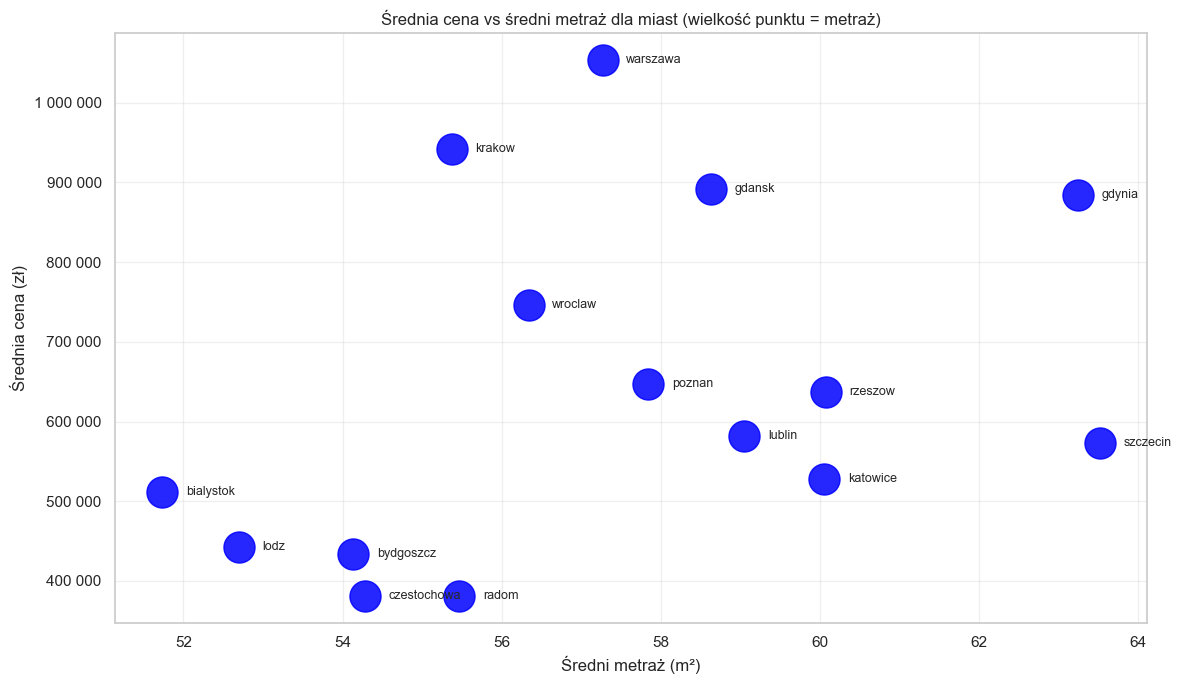

In [76]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# 1.
# Obliczamy średnią cenę i metraż dla każdego miasta
df_plot = df.groupby('city')[['price', 'squareMeters']].mean().reset_index()

df_plot.columns = ['city', 'avg_price', 'avg_squareMeters']

# 2. DEFINICJA OSI
x = df_plot['avg_squareMeters']
y = df_plot['avg_price']

sizes = 500  

# 3. RYSOWANIE WYKRESU
fig, ax = plt.subplots(figsize=(12, 7))

# Przykład dla koloru niebieskiego
sc = ax.scatter(x, y, s=sizes, c='blue', alpha=0.85)

# 4. PODPISY MIAST
for _, r in df_plot.iterrows():
    ax.text(r['avg_squareMeters'] + 0.3, r['avg_price'], r['city'], fontsize=9, va='center')

# 5. FORMATOWANIE
ax.set_xlabel('Średni metraż (m²)')
ax.set_ylabel('Średnia cena (zł)')
ax.set_title('Średnia cena vs średni metraż dla miast (wielkość punktu = metraż)')
ax.grid(alpha=0.3)

# Formatowanie osi Y 
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda val, pos: f"{int(val):,}".replace(',', ' ')))

plt.tight_layout()
plt.show()

W oparciu o powyższy wykres zależności średniej ceny do średniego metrażu w danym mieście , dokonano segmentacji badanych miast, wyodrębniając cztery główne klastry o zbliżonej charakterystyce rynkowej.
Na wykresie można wyodrębnić cztery wyraźne grupy miast o odmiennej charakterystyce:

      
1. Warszawa jest outlierem. Jest to rynek całkowicie oderwany od reszty kraju pod względem cenowym. Mimo że średni metraż  nie odbiega od średniej krajowej, cena całkowita jest wyższa niż w kolejnych najdroższych miastach.
2. Klaster 2: Rynki Premium.
    Miasta: Kraków, Gdańsk, Gdynia
   Charakterystyka:Ścisła czołówka Polski.
   Kraków ma wysoką cenę przy najmniejszym metrażu ze zbioru. Gdynia ma z kolei największą średni metraż z tej grupy i drugi największy z wszystkich podanych miast.
3. Wrocław, Poznań, Rzeszów, Szczecin, Lublin, Katowice.
Ceny zawierają się w przedziale 550 tys. – 750 tys. zł.Wyróżnia się tu podgrupa miast oferujących dużą przestrzeń (Szczecin, Katowice, Rzeszów).
4. Rynki Budżetowe Kolor: 
Miasta o najniższej barierze wejścia (ceny poniżej 550 tys. zł) i najmniejszym przeciętnim metrażu.

In [77]:
## Etap 2 - Analiza brakujących danych
# liczba brakujacych danych (całkowita)
n_miss = df.isna().sum().sum()
print("n_miss:", n_miss)  

# liczba kompletnych obserwacji (wierszy bez braków)
n_complete = df.dropna().shape[0]
print("n_complete:", n_complete)  # liczba kompletnych obserwacji

# proporcja braków (w skali całego dataframe)
prop_miss = n_miss / (df.shape[0] * df.shape[1])
print("prop_miss:", prop_miss)  # proporcja brakujacych danych

# dodatkowo: brakujące wartości na kolumnę (opcjonalne)
print("missing per column:\n", df.isna().sum())

# ponowne obliczenie i wyświetlenie wyników
print("n_complete (computed):", n_complete)  # liczba kompletnych obserwacji
print("prop_miss (computed):", prop_miss)    # proporcja

n_miss: 37990
n_complete: 2750
prop_miss: 0.0631033772515564
missing per column:
 id                          0
city                        0
type                     4397
squareMeters                0
rooms                       0
floor                    3573
floorCount                209
buildYear                3380
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             11
clinicDistance             63
postOfficeDistance         20
kindergartenDistance       19
restaurantDistance         31
collegeDistance           584
pharmacyDistance           30
ownership                   0
buildingMaterial         8792
condition               15921
hasParkingSpace             0
hasBalcony                  0
hasElevator               960
hasSecurity                 0
hasStorageRoom              0
price                       0
dtype: int64
n_complete (computed): 2750
prop_miss (computed): 0.0631033772515

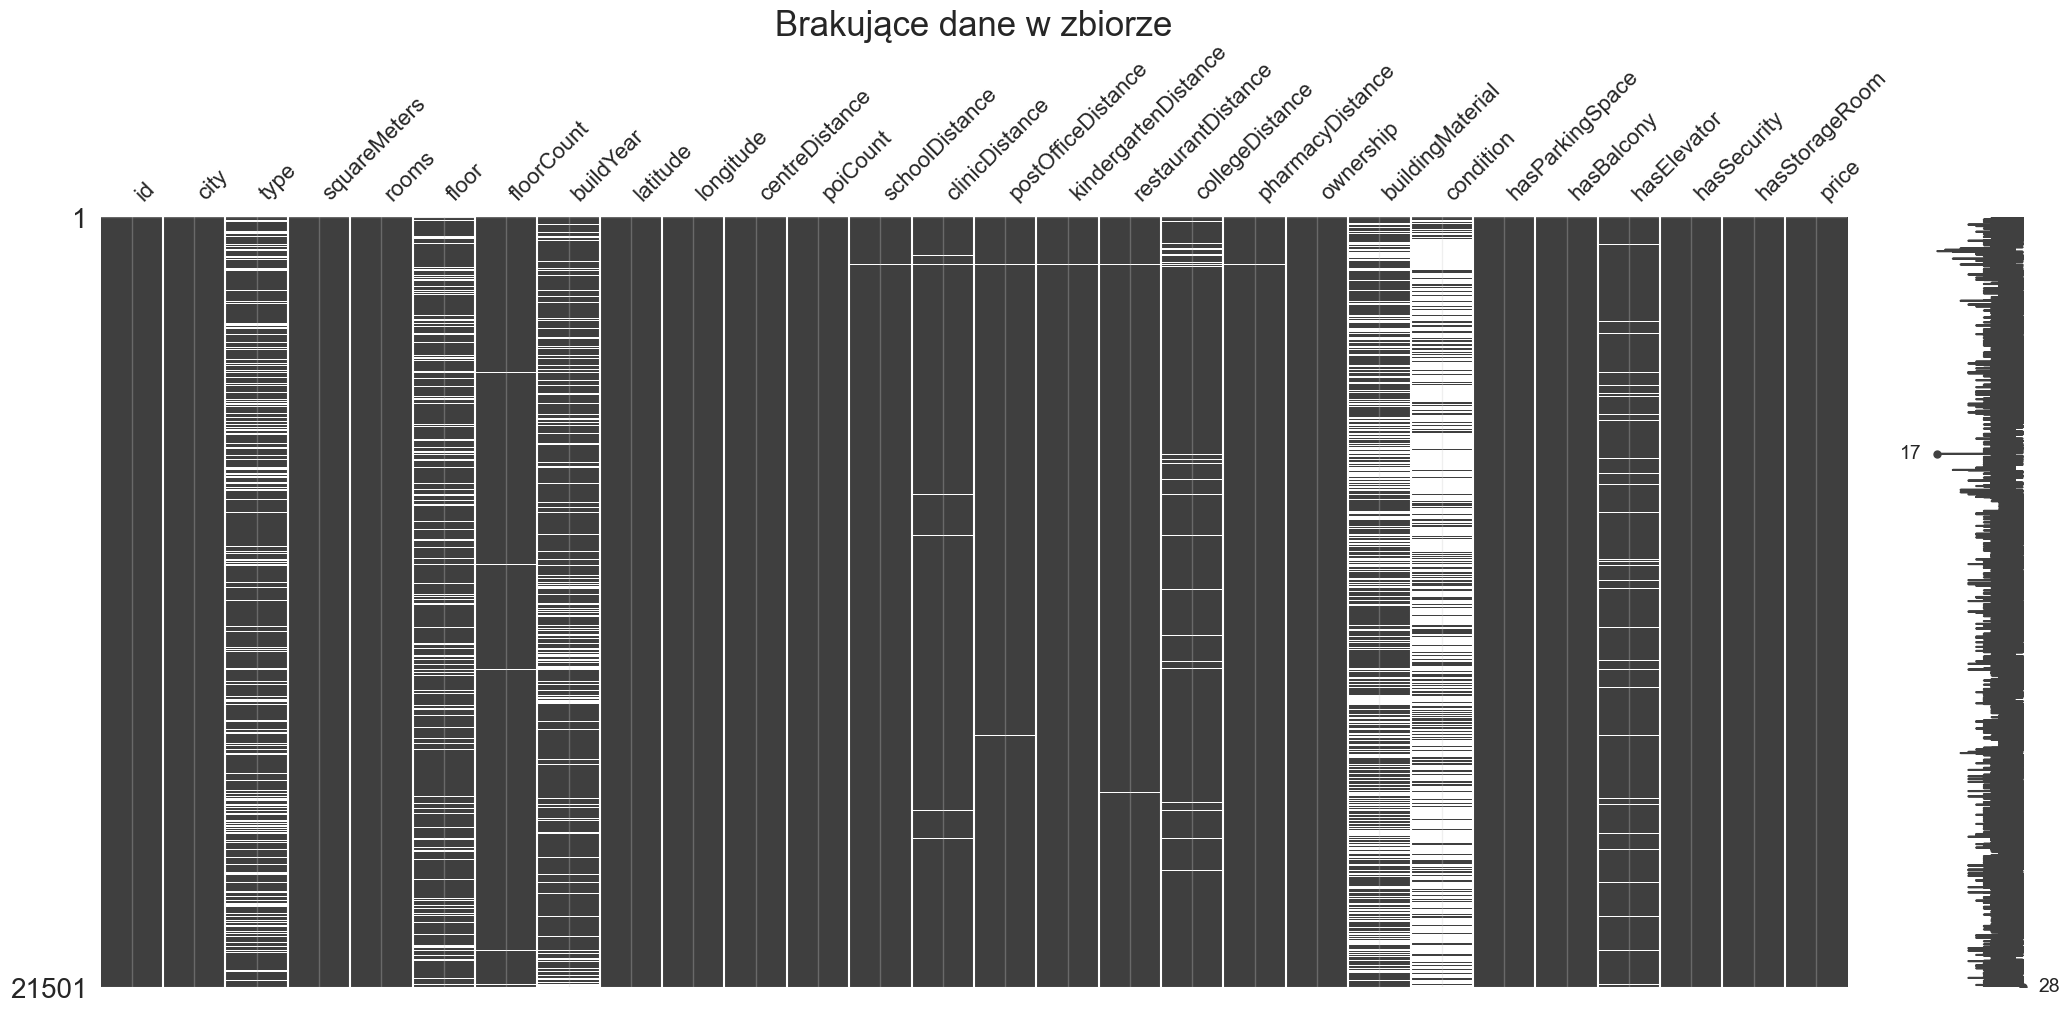

In [78]:
import missingno as msno
import matplotlib.pyplot as plt

ax = msno.matrix(df) 

ax.set_title('Brakujące dane w zbiorze', fontsize=25, y=1.225) 

ax.grid(alpha=0.3) 

plt.show()


In [79]:
# proporcja braków w poszczególnych kolumnach
prop_miss_cols = df.isna().sum() / df.shape[0]

print("Proporcje braków w kolumnach:")
print(prop_miss_cols)

# wizualizacja braków w kolumnach
prop_miss_cols_pct = df.isna().mean() * 100
print("Procent braków w kolumnach:")
print(prop_miss_cols_pct)


Proporcje braków w kolumnach:
id                      0.000000
city                    0.000000
type                    0.204502
squareMeters            0.000000
rooms                   0.000000
floor                   0.166178
floorCount              0.009720
buildYear               0.157202
latitude                0.000000
longitude               0.000000
centreDistance          0.000000
poiCount                0.000000
schoolDistance          0.000512
clinicDistance          0.002930
postOfficeDistance      0.000930
kindergartenDistance    0.000884
restaurantDistance      0.001442
collegeDistance         0.027162
pharmacyDistance        0.001395
ownership               0.000000
buildingMaterial        0.408911
condition               0.740477
hasParkingSpace         0.000000
hasBalcony              0.000000
hasElevator             0.044649
hasSecurity             0.000000
hasStorageRoom          0.000000
price                   0.000000
dtype: float64
Procent braków w kolumnach:
id 

Wykres przedstawia brakujące wartości w badanym zbiorze danych.
 Ciemne pola to dane kompletne, a białe brakujące.
 Zmienne niemal kompletne to: city, type, squareMeters, rooms, latitude, longitude, price.
 Są one istotnymi zmiennymi w kwestii zróżnicowania mieszkań i są całkowicie pozbawione braków.
 Przedstawia to jednolity ciemny wykres. Występują również zmienne z umiarkowanymi brakami. Sądzac z wykresu braki występują losowo i  raczej równomiernie w kolumnach: floorCount (0.9%),  zmiennych określajacych dystans ( które są też mniejsze niż 1%). 
 Zmienne : type, buildingMaterial i condition, mają duża częśc obserwacji brakujących. Jesto to odpowiednio 20%, 41%,74%. Będą one szczególnej uwagi przy czyszczeniu danych imputacja lub ich usunięcie.Podsumowując, większość kluczowych danych lokalizacja, metraż, cena jest kompletna, co czyni zbiór gotowym do dalszej analizy. Braki koncentrują się głównie na zmiennych opisujących wyposażenie i stan budynku.

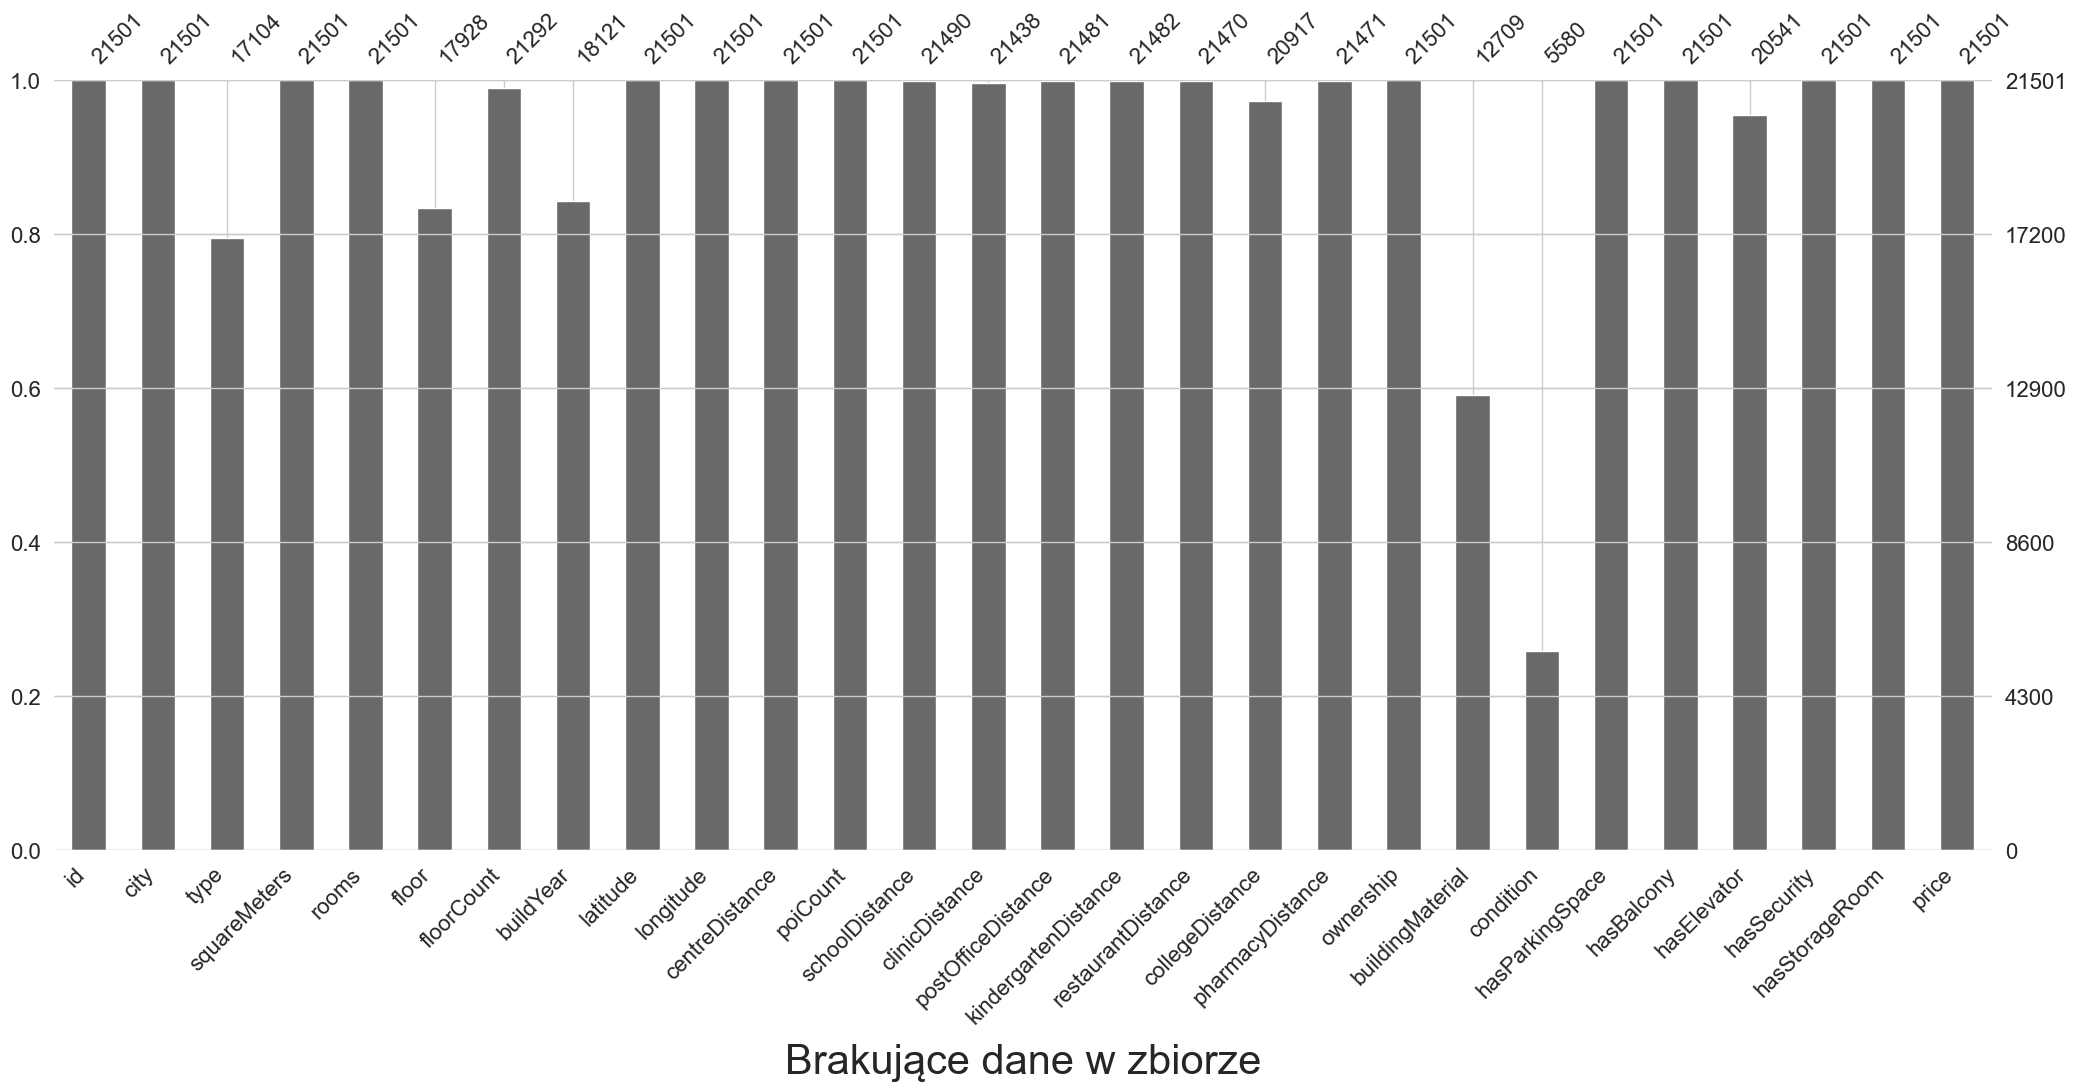

In [80]:

ax=msno.bar(df)

ax.set_title('Brakujące dane w zbiorze', y=-0.3, fontsize=30)

plt.show()

In [81]:
def is_special(x):
    if np.issubdtype(x.dtype, np.number):
        return ~np.isfinite(x)
    else:
        return x.isna()

df.apply(is_special)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21496,False,False,True,False,False,False,False,True,False,False,...,False,False,True,True,False,False,False,False,False,False
21497,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
21498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
21499,False,False,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [82]:
import numpy as np
import pandas as pd

# Definiujemy
def is_special(x):
    if np.issubdtype(x.dtype, np.number):
        return ~np.isfinite(x) # Zwraca True dla NaN oraz inf/-inf
    else:
        return x.isna()
total_special = df.apply(is_special).sum()
just_na = df.isna().sum()
def count_inf(x):
    if np.issubdtype(x.dtype, np.number):
        return np.isinf(x).sum()
    return 0

just_inf = df.apply(count_inf)

# Tabela podsumowującą
raport = pd.DataFrame({
    'Wszystkie Specjalne': total_special,
    'Tylko Braki (NA)': just_na,
    'Tylko Nieskończoności (Inf)': just_inf
})

# Filtrujemy, żeby pokazać tylko kolumny, gdzie cokolwiek wykryto
raport_z_bledami = raport[raport['Wszystkie Specjalne'] > 0]

print(raport_z_bledami)

                      Wszystkie Specjalne  Tylko Braki (NA)  \
type                                 4397              4397   
floor                                3573              3573   
floorCount                            209               209   
buildYear                            3380              3380   
schoolDistance                         11                11   
clinicDistance                         63                63   
postOfficeDistance                     20                20   
kindergartenDistance                   19                19   
restaurantDistance                     31                31   
collegeDistance                       584               584   
pharmacyDistance                       30                30   
buildingMaterial                     8792              8792   
condition                           15921             15921   
hasElevator                           960               960   

                      Tylko Nieskończoności (Inf)  
ty

In [83]:
# Liczba wierszy do odrzucenia (gdyby miały złą niską cenę)
liczba_do_odrzucenia = ((df["price"] < 150000)).sum()

print(f"Liczba ofert do odrzucenia: {liczba_do_odrzucenia}")


Liczba ofert do odrzucenia: 0


W zbiorze danych występują jedynie braki danych w postaci wartości NaN (braków typowych). Nie ma innych "specjalnych" braków, takich jak nieskończoności (Inf) czy wartości nieprawidłowe np. cena poniżej 150 tys złotych. W 06.2024 w największych miastach Poski mieszkanie nie mogłoby byc wystawione na sprzedaz za tą cenę.

<Figure size 1200x500 with 0 Axes>

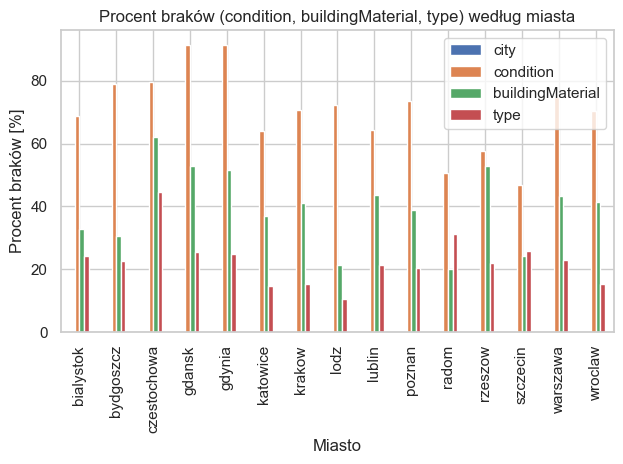

In [84]:


# --- Funkcja: procent braków wg miasta ---
def gg_miss_city_selected(df, 
                          city_col="city",
                          selected_cols=["condition", "buildingMaterial", "type"],
                          figsize=(12,5)):

    # filtr tylko wybranych kolumn
    df_selected = df[[city_col] + selected_cols]

    # liczba obserwacji w każdym mieście
    count_by_city = df_selected.groupby(city_col).size()

    # liczba braków w poszczególnych kolumnach wg miasta
    miss_count = df_selected.isna().groupby(df_selected[city_col]).sum()

    # procent braków = (liczba braków / liczba rekordów) * 100
    miss_pct = (miss_count.T / count_by_city).T * 100

    # wykres
    plt.figure(figsize=figsize)
    miss_pct.plot(kind="bar")
    plt.title("Procent braków (condition, buildingMaterial, type) według miasta")
    plt.ylabel("Procent braków [%]")
    plt.xlabel("Miasto")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# --- Wywołanie ---
gg_miss_city_selected(df)


In [85]:
# Obliczamy procent braków w danych
n_cols = df.shape[1]
city_counts = df.groupby("city").size()
missing_counts = df.groupby("city").apply(lambda g: g.isna().sum().sum())
missing_pct_by_city = (missing_counts / (city_counts * n_cols)) * 100

# Sortujemy malejąco i pokazujemy wynik
missing_pct_by_city = missing_pct_by_city.sort_values(ascending=False)
print(missing_pct_by_city)

# Najgorsze miasto pod względem braków
worst_city = missing_pct_by_city.index[0]
worst_pct = missing_pct_by_city.iloc[0]
print(f"\nMiasto z największym procentem braków: {worst_city} ({worst_pct:.2f}%)")

city
czestochowa    9.582560
gdynia         8.096101
gdansk         7.495324
bydgoszcz      6.735021
katowice       6.661046
poznan         6.575392
rzeszow        6.332165
warszawa       6.152276
krakow         5.976227
wroclaw        5.793546
lublin         5.711797
bialystok      5.674088
lodz           5.655994
szczecin       5.199823
radom          5.091575
dtype: float64

Miasto z największym procentem braków: czestochowa (9.58%)


/var/folders/bx/fc2tzxh914n0r9hxdg93ndgw0000gn/T/ipykernel_27306/3476469202.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_counts = df.groupby("city").apply(lambda g: g.isna().sum().sum())


Na przedstawionym wykresie kolumnowym widzimy udział brakujących wartości dla trzech zmiennych opisujących oferty mieszkaniowe analizowane w tym projekcie: condition, buildingMaterial oraz type, pogrupowanych według miasta. Brak definiujemy jako brak jednej zmiennej w danym ogłoszeniu.
Najbardziej wyróżnia się zmienna condition, która we wszystkich miastach charakteryzuje się zdecydowanie najwyższym odsetkiem braków. 
W przypadku pozostałych zmiennych udziały braków są mniejsze, choć zauważalnie zróżnicowane pomiędzy miastami. Co ciekawe, mimo że średni poziom braków w zmiennej buildingMaterial jest wyższy, to w części miast występuje odwrotna zależność — np. w Częstochowie i Gdansku odsetek braków dla type jest większy niż dla buildingMaterial.
Miasta o najniższej jakości pełnych informacji w ogłoszeniach to:

Częstochowa – niemal 10% wszystkich informacji w analizowanych zmiennych jest nieuzupełnionych,

Gdynia – około 8%,

Gdańsk – blisko 7,5%.

Wskazuje to, że w tych miastach użytkownicy rynku nieruchomości mogli częściej napotkać niekompletne opisy ofert w czerwcu 2024, co mogło utrudniac porównywanie mieszkań i podejmowanie decyzji zakupowych.

In [86]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, IterativeImputer

# 1. Grupa: Dane opisowe z dużymi brakami condition i buildingMaterial - usuwamy
df.drop(columns=['condition', 'buildingMaterial'], inplace=True)


# 2. Grupa: Numeryczne ważne (floor, buildYear,floorCount i wszystkie zmienne distance) 
import pandas as pd
import numpy as np


# A. Lista zmiennych, które chcesz naprawić metodą MICE
cols_to_impute = [
    'buildYear', 
    'floor', 
    'floorCount', 
    'centreDistance',
    'poiCount',
    'schoolDistance',
    'clinicDistance',
    'postOfficeDistance',
    'kindergartenDistance',
    'restaurantDistance',
    'collegeDistance',
    'pharmacyDistance'
]

# B. Konfiguracja imputera (random_state dla powtarzalności wyników)
iter_imputer = IterativeImputer(random_state=42)

# C. Wykonanie imputacji TYLKO na wybranych kolumnach
# Wynik fit_transform to macierz NumPy, więc przypisujemy ją z powrotem do tych samych kolumn w df
df[cols_to_impute] = iter_imputer.fit_transform(df[cols_to_impute])

# D. Zaokrąglamy rok budowy, piętro na którym znajduje się mieszkanie i liczbę pięter do liczb całkowitych zgodnie z logiką 
cols_integers = ['buildYear', 'floor', 'floorCount']

for col in cols_integers:
    # 
    df[col] = df[col].round().astype('Int64') # Int64 (z dużej litery) pozwala zachować format integer

# E. Sprawdzenie efektów (czy zniknęły braki w tych kolumnach)
print("Braki danych po MICE:")
print(df[cols_to_impute].isna().sum())

# 3. Grupa: Winda (binarna/kategoryczna) -> KNN Imputer
from sklearn.impute import KNNImputer
import numpy as np

# PRZYGOTOWANIE: Zamieniamy YES/NO na 1/0 
df['hasElevator'] = df['hasElevator'].map({'yes':1, 'no':0})
df['hasElevator'] = df['hasElevator'].astype(float)



from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#  Wybór cech: Winda (cel) + Lokalizacja + Cechy budynku
# Dodajemy latitude i longitude
features_knn = ['hasElevator', 'latitude', 'longitude', 'floorCount', 'buildYear']

#  PRZYGOTOWANIE DANYCH (Skalowanie)
# Tworzymy tymczasową kopię danych do obliczeń
df_temp = df[features_knn].copy()

# Zmieniamy na binarne
scaler = MinMaxScaler()
df_temp_scaled = pd.DataFrame(scaler.fit_transform(df_temp), columns=features_knn)

#  URUCHOMIENIE KNN NA PRZESKALOWANYCH DANYCH
# Teraz odległość geograficzna ma takie samo znaczenie jak rok budowy
knn_imputer = KNNImputer(n_neighbors=5)
df_filled_scaled = knn_imputer.fit_transform(df_temp_scaled)

#  ODZYSKANIE WYNIKU
# Wynik jest w skali 0-1. Interesuje nas tylko kolumna hasElevator (indeks 0 w features_knn)
# Musimy ją "odwrócić" ze skalowania lub po prostu zaokrąglić, 

# Wyciągamy kolumnę z macierzy (to są ułamki np. 0.8, 0.2)
imputed_values = df_filled_scaled[:, 0]

# Zaokrąglamy do 0 lub 1 i przypisujemy do oryginalnego DataFrame
df['hasElevator'] = imputed_values.round().astype('int64')

# Sprawdzenie
print("Braki po KNN z lokalizacją:", df['hasElevator'].isna().sum())


## teraz imputacja zmiennej typu budynku (type) za pomocą KNN z lokalizacją

#  WYBÓR CECH 
# Typ budynku zależy mocno od: roku budowy, liczby pięter i lokalizacji.
features = ['latitude', 'longitude', 'buildYear', 'floorCount']
target = 'type'

# PRZYGOTOWANIE DANYCH
# Musimy podzielić dane na dwie grupy:
# A. Treningowe: Tam gdzie ZNAMY typ (uczymy się na nich)
# B. Do uzupełnienia: Tam gdzie typ to NaN (będziemy zgadywać)
train_data = df[df[target].notna()].copy()
missing_data = df[df[target].isna()].copy()


if len(missing_data) > 0:
    
    # 3. SKALOWANIE 
    # Żeby rok budowy (2000) nie zdominował współrzędnych (52.00)
    scaler = MinMaxScaler()
    
    # Skalujemy cechy w obu zestawach
    X_train = scaler.fit_transform(train_data[features])
    X_missing = scaler.transform(missing_data[features]) 
    
    y_train = train_data[target]

    # 4. KONFIGURACJA I NAUKA (Głosowanie)
    # n_neighbors=10: Bierzemy pod uwagę 10 najbliższych sąsiadów.
    # weights='distance': Bliżsi sąsiedzi mają ważniejszy głos.
    from sklearn.neighbors import KNeighborsClassifier
    knn_classifier = KNeighborsClassifier(n_neighbors=10, weights='distance')
    knn_classifier.fit(X_train, y_train)

    # 5. PRZEWIDYWANIE (Uzupełnianie braków)
    predicted_types = knn_classifier.predict(X_missing)

    # 6. WSTAWIENIE DO TABELI
    # Wstawiamy przewidziane wartości tylko tam, gdzie były braki
    df.loc[df[target].isna(), target] = predicted_types

    print("Sukces! Braki w 'type' po głosowaniu sąsiadów:", df['type'].isna().sum())
    
else:
    print("Brak brakujących danych w kolumnie 'type'.")



# 5.Sprawdzenie
print("Pozostałe braki:", df.isna().sum().sum())

Braki danych po MICE:
buildYear               0
floor                   0
floorCount              0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
dtype: int64
Braki po KNN z lokalizacją: 0
Sukces! Braki w 'type' po głosowaniu sąsiadów: 0
Pozostałe braki: 0


In [87]:
# Pokaż kolumny i liczbę brakujących wartości (oraz procent braków)
missing_count = df.isna().sum()
missing_pct = df.isna().mean() * 100

missing_summary = pd.DataFrame({
    'missing_count': missing_count,
    'missing_pct': missing_pct
}).sort_values(by='missing_count', ascending=False)

# Wyświetl wszystkie kolumny (posortowane malejąco według liczby braków)
print(missing_summary)

# Tylko kolumny z brakami:
print("\nKolumny z brakami:")
print(missing_summary[missing_summary['missing_count'] > 0])

                      missing_count  missing_pct
id                                0          0.0
city                              0          0.0
hasStorageRoom                    0          0.0
hasSecurity                       0          0.0
hasElevator                       0          0.0
hasBalcony                        0          0.0
hasParkingSpace                   0          0.0
ownership                         0          0.0
pharmacyDistance                  0          0.0
collegeDistance                   0          0.0
restaurantDistance                0          0.0
kindergartenDistance              0          0.0
postOfficeDistance                0          0.0
clinicDistance                    0          0.0
schoolDistance                    0          0.0
poiCount                          0          0.0
centreDistance                    0          0.0
longitude                         0          0.0
latitude                          0          0.0
buildYear           

Wnioskowanie statystyczne

In [89]:
# Dodawanie zmiennej 'price_per_m2'
df['pricePerM2'] = df['price'] / df['squareMeters']   
print(df)

                                     id       city               type  \
0      811891f98a870dfd6e414374a0a85560   szczecin       blockOfFlats   
1      adaf636d0c44d8d9325bce42403eefee   szczecin  apartmentBuilding   
2      9b957bd60885a469c96f17b58a914f4b   szczecin  apartmentBuilding   
3      74fef2ff7135bc70797a3fbfd7d44ed6   szczecin       blockOfFlats   
4      77cc78c75b0d09bf84d6d3124a28803c   szczecin       blockOfFlats   
...                                 ...        ...                ...   
21496  ca83fdbc19c1e62e1cc6b6b21dcd5e03  bydgoszcz       blockOfFlats   
21497  204c93689b7cdc62a17ef3c0dbf7034a  bydgoszcz           tenement   
21498  bb19da639a2de8bba49be2ca49053c87  bydgoszcz           tenement   
21499  1e7f4f1fdfea31eb84e071d697839632  bydgoszcz           tenement   
21500  60fcbfa2a2a48ebcc2e554efba7f2729  bydgoszcz           tenement   

       squareMeters  rooms  floor  floorCount  buildYear   latitude  \
0             47.00    2.0      6          12       

In [90]:
# Zamiana zmiennych binarnych kategorycznych z 'yes'/'no' na 1/0
cols = ["hasParkingSpace", "hasBalcony", "hasSecurity", "hasStorageRoom"]
for col in cols:
    print(col, df[col].unique())

df[cols] = df[cols].applymap(lambda x: 1 if x == 'yes' else 0)
df.head()

hasParkingSpace ['no' 'yes']
hasBalcony ['yes' 'no']
hasSecurity ['no' 'yes']
hasStorageRoom ['yes' 'no']


/var/folders/bx/fc2tzxh914n0r9hxdg93ndgw0000gn/T/ipykernel_27306/3660179200.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols] = df[cols].applymap(lambda x: 1 if x == 'yes' else 0)


,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,pricePerM2
0,811891f98a870dfd6e414374a0a85560,szczecin,blockOfFlats,47.00,2.0,6,12,1981,53.428544,14.552812,...,0.593,0.085,condominium,0,1,1,0,1,449000,9553.191489
1,adaf636d0c44d8d9325bce42403eefee,szczecin,apartmentBuilding,88.22,3.0,1,2,2000,53.449093,14.516844,...,1.192,0.668,condominium,1,1,0,0,0,950000,10768.533212
2,9b957bd60885a469c96f17b58a914f4b,szczecin,apartmentBuilding,117.00,5.0,4,4,1983,53.443096,14.561348,...,1.522,0.229,udział,1,1,0,0,0,1099000,9393.162393
3,74fef2ff7135bc70797a3fbfd7d44ed6,szczecin,blockOfFlats,33.31,1.0,1,4,1963,53.436100,14.541200,...,0.041,0.388,cooperative,1,0,0,1,1,380000,11407.985590
4,77cc78c75b0d09bf84d6d3124a28803c,szczecin,blockOfFlats,56.00,3.0,7,7,2018,53.447465,14.557811,...,1.643,0.178,condominium,1,1,1,1,1,799000,14267.857143


In [94]:
# -----------------------------
# 1. Sprawdzenie czy próba jest wystarczająca
# -----------------------------

n = len(df)
print("Liczba obserwacji:", n)

# Reguła kciuka – dla średniej zazwyczaj n > 30 wystarcza
print("Czy próba jest wystarczająca do estymacji średniej? ->", n > 30)

# Dla proporcji – min 10 sukcesów i 10 porażek
def check_proportion_condition(series):
    successes = (series == 1).sum()
    failures = (series == 0).sum()
    return successes >= 10 and failures >= 10

print("Czy dla zmiennych binarnych jest wystarczająca ilość sukcesów i porażek?")
for col in ["hasParkingSpace", "hasBalcony", "hasElevator", "hasSecurity", "hasStorageRoom"]:
    print(col, check_proportion_condition(df[col]))

Liczba obserwacji: 21501
Czy próba jest wystarczająca do estymacji średniej? -> True
Czy dla zmiennych binarnych jest wystarczająca ilość sukcesów i porażek?
hasParkingSpace True
hasBalcony True
hasElevator True
hasSecurity True
hasStorageRoom True


--- 🇵🇱 Analiza dla CAŁEJ POLSKI ---

## Przedział Ufności dla Średniej Ceny za M2 (95%)
Średnia cena w próbie: 14608.05 PLN/m2
Przedział ufności: (14538.82 - 14677.28) PLN/m2

-----------------------------------------------------

## Wyniki Przedziałów Ufności dla Miast (PLN/m2)
                 mean  ci_lower  ci_upper
city                                     
warszawa     18503.96  18411.75  18596.18
krakow       17135.48  17005.13  17265.84
gdansk       15402.31  15209.96  15594.67
gdynia       14020.05  13702.85  14337.24
wroclaw      13562.28  13449.51  13675.06
poznan       11472.10  11318.28  11625.92
rzeszow      10803.55  10514.62  11092.49
bialystok    10089.06   9852.10  10326.02
lublin       10060.79   9915.14  10206.44
szczecin      9529.45   9335.63   9723.27
katowice      9038.26   8840.14   9236.37
lodz          8536.00   8457.21   8614.79
bydgoszcz     8194.03   8082.89   8305.17
czestochowa   7034.63   6894.50   7174.75
radom         6929.92   6758.66   7101.18


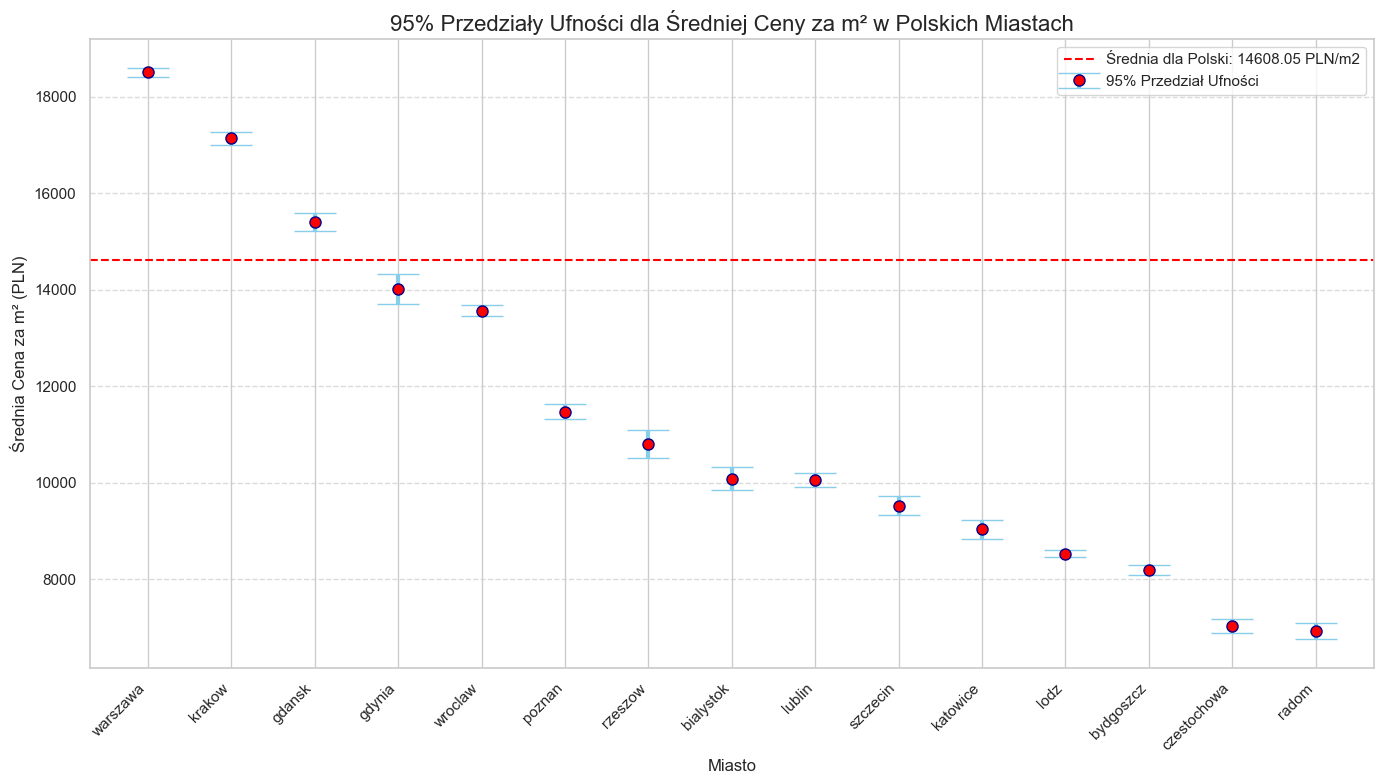

In [105]:
# -----------------------------
# 2. Przedział Ufności dla Średniej Ceny za M2 w CAŁEJ POLSCE
# -----------------------------

# Ustawienie estetyki wykresów
sns.set_theme(style="whitegrid")

print("--- 🇵🇱 Analiza dla CAŁEJ POLSKI ---")

confidence_level = 0.95
pricePerM2_mean = df['pricePerM2'].mean()
pricePerM2_std = df['pricePerM2'].std()
n = len(df)
std_err_mean = pricePerM2_std / np.sqrt(n)

# Obliczenie przedziału ufności (95%) za pomocą statystyki Z
ci_mean = stats.norm.interval(confidence_level, loc=pricePerM2_mean, scale=std_err_mean)

print("\n## Przedział Ufności dla Średniej Ceny za M2 (95%)")
print(f"Średnia cena w próbie: {pricePerM2_mean:.2f} PLN/m2")
print(f"Przedział ufności: ({ci_mean[0]:.2f} - {ci_mean[1]:.2f}) PLN/m2")

print("\n-----------------------------------------------------")

## 2. Obliczenie Przedziałów Ufności dla POSZCZEGÓLNYCH MIAST

# Funkcja pomocnicza do obliczania CI
def calculate_ci(group, confidence_level=0.95):
    """Oblicza średnią, błąd standardowy i granice CI dla danej kolumny danych."""
    n = len(group)
    mean = group.mean()
    std = group.std()
    
    # Obliczanie błędu standardowego średniej
    std_err = std / np.sqrt(n)
    
    # Wartość Z dla danego poziomu ufności (np. 1.96 dla 95%)
    # Używamy Z, bo n jest zazwyczaj duże w miastach
    z_score = stats.norm.ppf((1 + confidence_level) / 2)
    
    margin_of_error = z_score * std_err
    
    # Zwraca średnią, dolną i górną granicę CI
    return pd.Series({
        'mean': mean,
        'ci_lower': mean - margin_of_error,
        'ci_upper': mean + margin_of_error,
        'moe': margin_of_error # Margines błędu
    })

# Zastosowanie funkcji do zgrupowanych danych
ci_by_city = df.groupby('city')['pricePerM2'].apply(calculate_ci).unstack()

# Sortowanie wyników po średniej cenie (od najdroższej)
ci_by_city = ci_by_city.sort_values(by='mean', ascending=False)

print("\n## Wyniki Przedziałów Ufności dla Miast (PLN/m2)")
print(ci_by_city[['mean', 'ci_lower', 'ci_upper']].apply(lambda x: x.round(2)))

## 3. Generowanie Wykresu Słupkowego z Przedziałami Ufności

plt.figure(figsize=(14, 8))

# Tworzenie kolumny dla marginesu błędu (MoE), niezbędnej dla wykresu errorbar
# Margines błędu to odległość od średniej do górnej/dolnej granicy CI
yerr_data = ci_by_city['moe'] 

plt.errorbar(
    x=ci_by_city.index, # Nazwy miast
    y=ci_by_city['mean'], # Średnia cena (punkt centralny)
    yerr=yerr_data, # Margines błędu (długość ramienia)
    fmt='o', # Format znacznika (kropka)
    capsize=15, # Rozmiar "czapeczki" na końcach ramion
    color='darkblue',
    ecolor='skyblue',
    elinewidth=3,
    markerfacecolor='red',
    markersize=8,
    label='95% Przedział Ufności'
)

# Dodanie średniej ceny jako linii horyzontalnej (np. całej Polski)
plt.axhline(pricePerM2_mean, color='red', linestyle='--', linewidth=1.5, label=f'Średnia dla Polski: {pricePerM2_mean:.2f} PLN/m2')

plt.title('95% Przedziały Ufności dla Średniej Ceny za m² w Polskich Miastach', fontsize=16)
plt.xlabel('Miasto', fontsize=12)
plt.ylabel('Średnia Cena za m² (PLN)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Poniższy tag wygeneruje wizualizację, która jest kluczowa dla zrozumienia wyników.

Przedział ufności to zakres wartości, obliczony na podstawie danych z próby, który z określonym poziomem ufności (w tym przypadku 95%) zawiera rzeczywisty, nieznany parametr populacji (np. średnią μ lub proporcję p). 95% przedział ufności dla średniej ceny za metr kwadratowy oznacza, że istnieje 95% prawdopodobieństwo, iż faktyczna średnia cena w całej populacji ofert mieści się w wyznaczonym zakresie.

--- 📏 Klasyfikacja Mieszkań na 3 Grupy (Tercyle) ---
Liczba wszystkich obserwacji (n): 21501
--------------------------------------------------
## 📐 Granice Podziału (Powierzchnia w m²)
Minimum (min): 25.00 m²
**1/3 Kwantyl (Q1/3): 46.51 m²**
**2/3 Kwantyl (Q2/3): 61.18 m²**
Maksimum (max): 150.00 m²
--------------------------------------------------
## 🏷️ Klasyfikacja Mieszkań na podstawie Powierzchni (squareMeters):
* **Małe (Small):** Powierzchnia do 46.51 m²
* **Średnie (Medium):** Powierzchnia od 46.51 m² do 61.18 m²
* **Duże (Large):** Powierzchnia powyżej 61.18 m²

## 🔢 Liczność Mieszkań w Utworzonych Grupach:
size_group
Małe (Small)        7168
Duże (Large)        7167
Średnie (Medium)    7166
Name: count, dtype: int64
--------------------------------------------------
## 💰 Wyniki Przedziałów Ufności (PLN/m2) dla Grup Wielkościowych
                      mean  ci_lower  ci_upper
size_group                                    
Małe (Small)      15647.41  15526.63  15768.19
Średni

/var/folders/bx/fc2tzxh914n0r9hxdg93ndgw0000gn/T/ipykernel_27306/1843009223.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ci_by_size = df.groupby('size_group')['pricePerM2'].apply(calculate_ci_group).unstack()


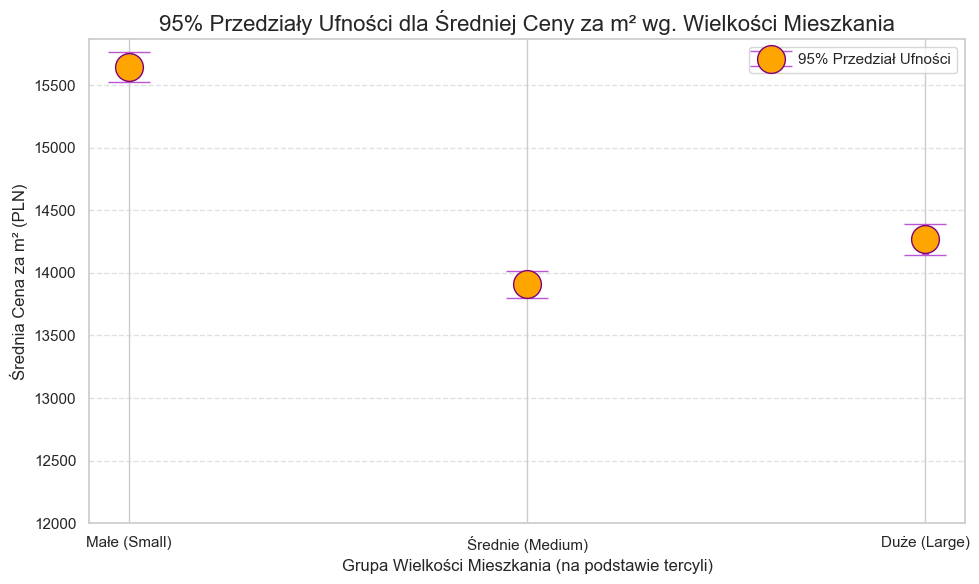

In [ ]:
# -----------------------------
# 3. Analiza CI i wizualizacja dla grup wielkościowych pod wzgledem powierzhni (małe, średnie, duże)
# -----------------------------------------------------

# Ustawienie estetyki wykresów
sns.set_theme(style="whitegrid")
confidence_level = 0.95

#FUNKCJA POMOCNICZA DO OBLICZANIA PRZEDZIAŁÓW UFNOŚCI (CI)


def calculate_ci_group(group, confidence_level=0.95):
    """Oblicza średnią, błąd standardowy i granice CI (95%) dla podanej serii danych."""
    n = len(group)
    mean = group.mean()
    std = group.std()
    
    # Obliczanie błędu standardowego średniej
    std_err = std / np.sqrt(n)
    
    # Wartość Z dla danego poziomu ufności
    z_score = stats.norm.ppf((1 + confidence_level) / 2)
    
    margin_of_error = z_score * std_err
    
    return pd.Series({
        'mean': mean,
        'ci_lower': mean - margin_of_error,
        'ci_upper': mean + margin_of_error,
        'moe': margin_of_error
    })


# KLASYFIKACJA I WYZNACZENIE GRANIC PODZIAŁU (TERCYLE)


print("--- 📏 Klasyfikacja Mieszkań na 3 Grupy (Tercyle) ---")

# a) Klasyfikacja
df['size_group'] = pd.qcut(
    df['squareMeters'],
    q=3,
    labels=['Małe (Small)', 'Średnie (Medium)', 'Duże (Large)'],
    duplicates='drop'
)

# b) Obliczenie i wyświetlenie granic
tercile_limits = df['squareMeters'].quantile([1/3, 2/3])
lower_limit = df['squareMeters'].min()
upper_limit = df['squareMeters'].max()
q1_3 = tercile_limits.iloc[0]
q2_3 = tercile_limits.iloc[1]

print(f"Liczba wszystkich obserwacji (n): {len(df)}")
print("-" * 50)

print("## 📐 Granice Podziału (Powierzchnia w m²)")
print(f"Minimum (min): {lower_limit:.2f} m²")
print(f"**1/3 Kwantyl (Q1/3): {q1_3:.2f} m²**")
print(f"**2/3 Kwantyl (Q2/3): {q2_3:.2f} m²**")
print(f"Maksimum (max): {upper_limit:.2f} m²")
print("-" * 50)

print("## 🏷️ Klasyfikacja Mieszkań na podstawie Powierzchni (squareMeters):")
print(f"* **Małe (Small):** Powierzchnia do {q1_3:.2f} m²")
print(f"* **Średnie (Medium):** Powierzchnia od {q1_3:.2f} m² do {q2_3:.2f} m²")
print(f"* **Duże (Large):** Powierzchnia powyżej {q2_3:.2f} m²")

print("\n## 🔢 Liczność Mieszkań w Utworzonych Grupach:")
print(df['size_group'].value_counts())
print("-" * 50)

# -----------------------------------------------------

# Zastosowanie funkcji do zgrupowanych danych (cena za m2)
ci_by_size = df.groupby('size_group')['pricePerM2'].apply(calculate_ci_group).unstack()

print("## 💰 Wyniki Przedziałów Ufności (PLN/m2) dla Grup Wielkościowych")
print(ci_by_size[['mean', 'ci_lower', 'ci_upper']].apply(lambda x: x.round(2)))

plt.figure(figsize=(10, 6))

# Margines błędu (MoE) dla wykresu errorbar
yerr_data = ci_by_size['moe'] 

# Tworzenie wykresu słupkowego (lub punktowego z errorbar)
plt.errorbar(
    x=ci_by_size.index, 
    y=ci_by_size['mean'],
    yerr=yerr_data,
    fmt='o', 
    capsize=15,
    color='purple',
    ecolor='mediumorchid',
    elinewidth=5,
    markerfacecolor='orange',
    markersize=20,
    label='95% Przedział Ufności'
)

# NOWA LINIA: Ustawienie skali osi Y od 5000 PLN
plt.ylim(12000, None) 

plt.title('95% Przedziały Ufności dla Średniej Ceny za m² wg. Wielkości Mieszkania', fontsize=16)
plt.xlabel('Grupa Wielkości Mieszkania (na podstawie tercyli)', fontsize=12)
plt.ylabel('Średnia Cena za m² (PLN)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Poniższy tag wygeneruje wizualizację

Przeprowadziliśmy analizę porównawczą średniej ceny za metr kwadratowy (pricePerM2) na polskim rynku nieruchomości, dzieląc mieszkania na trzy grupy: Małe, Średnie i Duże, na podstawie tercyli powierzchni. Stworzyliśmy te grupy, aby ocenić, czy cena jednostkowa różni się istotnie statystycznie w zależności od wielkości lokalu. Otrzymany wykres z 95% przedziałami ufności (CI) wizualnie potwierdza rynkową zasadę: najmniejsze mieszkania mają najwyszą cenę za m², ponieważ grupa "Małe" wykazuje najwyższą średnią.